## Exploring dataset

In [ ]:
!fastqc -o . SRR292862_1.fastq SRR292862_2.fastq SRR292770_1.fastq SRR292770_2.fastq SRR292678sub_S1_L001_R1_001.fastq SRR292678sub_S1_L001_R2_001.fastq 

In [31]:
!head -20 SRR292678sub_S1_L001_R1_001.fastq

@SRX079804:1:SRR292678:1:1101:1:1 1:N:0:1
ATGTTGCCGGAATATGCTTATGGCATCGACACGTTCTTACTATGTGTCGATGAAATTCGCTTTTTTAAACATGTCTTCTGGATATGTTTA
+
HHHHHHFHFGHHHHHHHHHFHFHHHGFHEHGHEFHHHHHHHHHHHHHHHHFHHHHHHHHHFHHHEHDGFHDFFEGGGGFGHBHHHE>EEE
@SRX079804:1:SRR292678:1:1101:3:3 1:N:0:1
AACAACGCTACCGACATCATCGTAAATTGCTGAAGCTATGCAATTCAGACCTACAACATGCTCTTCTTTATCTACGGTATAGCCCAGTTC
+
GGGGGGGGGGGGGGGGGGGEGGCGEGGGGGGGFGGGFBG>GGGGGGGGGGGEFGDGGGEFFDGBGGFG?GEGFEGEGEGEEDE?EEECDE
@SRX079804:1:SRR292678:1:1101:4:4 1:N:0:1
AGGATGGTTATTTTAAACCCGAGCAGCGTCAGGCGCTGTTTGAACGCATTCATGCCAGCGGAGCGCAAATCGTCACCGTTGCGATGGGAT
+
HHHHHHHHHHEFHFHHHHHHHBGGGHDHFHFHH@FHFHEGHHEDFH?EGHFFEHBG=GFFF=FBFFFHFFHFEHEFFFFF@EEEEHGHBF
@SRX079804:1:SRR292678:1:1101:5:5 1:N:0:1
TCAGCTTTTTGCCGACTACAAACTGCTACCACCGTTCCGCCAGCTCGACCGTAACAGCTACGCCCTGACAGAAGCCGAGCGCAATGCCAG
+
HGHGCHHHEHEEFHHGHHHHGGHFHHHHBHGGGGEHFGFFFFH;EBEFFFHFFH5FEABEGAFBF2@:>A?CCADGEFF>EEECA:8B?@
@SRX079804:1:SRR292678:1:1101:6:6 1:N:0:1
CGCCGACGCTGGTTGAAGAGCAAACCGTGCTGCAAAAGGTCACCGAAGTCAGCC

## k-mer profile and genome size estimation

In [4]:
!jellyfish count -m 31 -s 5M -C -o mer_31.jf SRR292678sub_S1_L001_R1_001.fastq

In [5]:
!jellyfish histo mer_31.jf > mer_31_depth_histo.csv

In [7]:
!head -20 mer_31_depth_histo.csv

1 6755622
2 266510
3 48557
4 18950
5 11926
6 9246
7 8919
8 9025
9 9349
10 10418
11 11379
12 12046
13 12854
14 14664
15 15701
16 16998
17 18624
18 19700
19 20947
20 22880


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
df = pd.read_csv('mer_31_depth_histo.csv', header=None, sep=' ', names=['depth', 'num'], index_col=0)

In [38]:
print(df.head())

           num
depth         
1      6755622
2       266510
3        48557
4        18950
5        11926


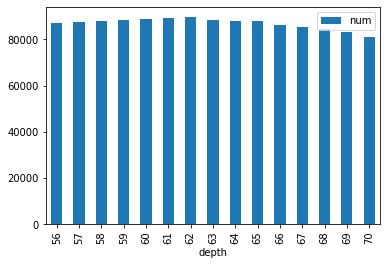

In [48]:
df[55:70].plot.bar()

In [50]:
L = 90
M = 64
K = 31
T = 5499346 * 90
N = (M * L) / (L - K + 1)
genome_size = T / N
# (N: Depth of coverage, M: Kmer peak, K: Kmer-size, L: avg read length T: Total bases)



In [51]:
print(int(genome_size))

5155636


In [20]:
!gunzip spades_results/corrected/SRR292678sub_S1_L001_R1_001.00.0_0.cor.fastq.gz

In [44]:
!jellyfish count -m 31 -s 6M -C -o cor_mer_31.jf spades_results/corrected/SRR292678sub_S1_L001_R1_001.00.0_0.cor.fastq

In [45]:
!jellyfish histo cor_mer_31.jf > cor_mer_31_depth_histo.csv

In [46]:
df2 = pd.read_csv('cor_mer_31_depth_histo.csv', header=None, sep=' ', names=['depth', 'num'], index_col=0)

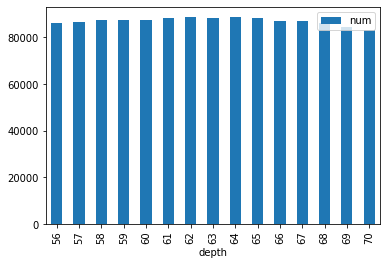

In [49]:
df2[45:70].plot.bar()


## Genome assembly using SPAdes

In [1]:
!spades.py --test

Command line: /Users/b2w/Prog/tools/SPAdes-3.13.0-Darwin/bin/spades.py	--test	

System information:
  SPAdes version: 3.13.0
  Python version: 3.7.4
  OS: Darwin-19.0.0-x86_64-i386-64bit

Output dir: /Users/b2w/Bioinf/Workshop/bioworkshop/spades_test
Mode: read error correction and assembling
Debug mode is turned OFF

Dataset parameters:
  Multi-cell mode (you should set '--sc' flag if input data was obtained with MDA (single-cell) technology or --meta flag if processing metagenomic dataset)
  Reads:
    Library number: 1, library type: paired-end
      orientation: fr
      left reads: ['/Users/b2w/Prog/tools/SPAdes-3.13.0-Darwin/share/spades/test_dataset/ecoli_1K_1.fq.gz']
      right reads: ['/Users/b2w/Prog/tools/SPAdes-3.13.0-Darwin/share/spades/test_dataset/ecoli_1K_2.fq.gz']
      interlaced reads: not specified
      single reads: not specified
      merged reads: not specified
Read error correction parameters:
  Iterations: 1
  PHRED offset will be auto-detected
  Corrected re

  0:00:00.699   104M / 3G    INFO    General                 (hammer_tools.cpp          : 168)   Prepared batch 0 of 2054 reads.
  0:00:00.709   104M / 3G    INFO    General                 (hammer_tools.cpp          : 175)   Processed batch 0
  0:00:00.717   104M / 3G    INFO    General                 (hammer_tools.cpp          : 185)   Written batch 0
  0:00:00.730    16M / 3G    INFO    General                 (hammer_tools.cpp          : 274)   Correction done. Changed 4 bases in 4 reads.
  0:00:00.730    16M / 3G    INFO    General                 (hammer_tools.cpp          : 275)   Failed to correct 0 bases out of 353915.
  0:00:00.730    16M / 3G    INFO    General                 (main.cpp                  : 255)   Saving corrected dataset description to /Users/b2w/Bioinf/Workshop/bioworkshop/spades_test/corrected/corrected.yaml
  0:00:00.731    16M / 3G    INFO    General                 (main.cpp                  : 262)   All done. Exiting.

== Compressing corrected reads (w

  0:00:00.360    16M / 3G    INFO   K-mer Index Building     (kmer_index_builder.hpp    : 336)   Index built. Total 2776 bytes occupied (22.5691 bits per kmer).
  0:00:00.360    16M / 3G    INFO    General                 (construction.cpp          : 388)   Collecting k-mer coverage information from reads, this takes a while.
  0:00:00.373    16M / 3G    INFO    General                 (construction.cpp          : 508)   Filling coverage and flanking coverage from PHM
  0:00:00.374    16M / 3G    INFO   StageManager             (stage.cpp                 : 132)   STAGE == EC Threshold Finding
  0:00:00.374    16M / 3G    INFO    General                 (kmer_coverage_model.cpp   : 181)   Kmer coverage valley at: 0
  0:00:00.374    16M / 3G    INFO    General                 (kmer_coverage_model.cpp   : 201)   K-mer histogram maximum: 348
  0:00:00.374    16M / 3G    INFO    General                 (kmer_coverage_model.cpp   : 237)   Estimated median coverage: 348. Coverage mad: 62.2692

  0:00:00.016     2G / 2G    INFO    General                 (kmer_splitters.hpp        : 295)   Adding contigs from previous K
  0:00:00.021    16M / 2G    INFO    General                 (kmer_splitters.hpp        : 308)   Used 8216 reads
  0:00:00.021    16M / 2G    INFO    General                 (kmer_index_builder.hpp    : 120)   Starting k-mer counting.
  0:00:00.027    16M / 2G    INFO    General                 (kmer_index_builder.hpp    : 127)   K-mer counting done. There are 972 kmers in total.
  0:00:00.027    16M / 2G    INFO    General                 (kmer_index_builder.hpp    : 133)   Merging temporary buckets.
  0:00:00.032    16M / 2G    INFO    General                 (stage.cpp                 : 101)   PROCEDURE == Extension index construction
  0:00:00.032    16M / 2G    INFO   K-mer Index Building     (kmer_index_builder.hpp    : 301)   Building kmer index
  0:00:00.032    16M / 2G    INFO    General                 (kmer_index_builder.hpp    : 117)   Splitting km

  0:00:00.000     4M / 4M    INFO    General                 (main.cpp                  :  74)   Loaded config from /Users/b2w/Bioinf/Workshop/bioworkshop/spades_test/K55/configs/config.info
  0:00:00.000     4M / 4M    INFO    General                 (memory_limit.cpp          :  49)   Memory limit set to 250 Gb
  0:00:00.000     4M / 4M    INFO    General                 (main.cpp                  :  87)   Starting SPAdes, built from N/A, git revision N/A
  0:00:00.000     4M / 4M    INFO    General                 (main.cpp                  :  88)   Maximum k-mer length: 128
  0:00:00.000     4M / 4M    INFO    General                 (main.cpp                  :  89)   Assembling dataset (/Users/b2w/Bioinf/Workshop/bioworkshop/spades_test/dataset.info) with K=55
  0:00:00.000     4M / 4M    INFO    General                 (main.cpp                  :  90)   Maximum # of threads to use (adjusted due to OMP capabilities): 4
  0:00:00.000     4M / 4M    INFO    General                

  0:00:00.323     3G / 3G    INFO    General                 (edge_index_builders.hpp   :  82)   Used 8 sequences.
  0:00:00.325    16M / 3G    INFO    General                 (kmer_index_builder.hpp    : 120)   Starting k-mer counting.
  0:00:00.346    16M / 3G    INFO    General                 (kmer_index_builder.hpp    : 127)   K-mer counting done. There are 949 kmers in total.
  0:00:00.346    16M / 3G    INFO    General                 (kmer_index_builder.hpp    : 133)   Merging temporary buckets.
  0:00:00.360    16M / 3G    INFO   K-mer Index Building     (kmer_index_builder.hpp    : 314)   Building perfect hash indices
  0:00:00.377    16M / 3G    INFO    General                 (kmer_index_builder.hpp    : 150)   Merging final buckets.
  0:00:00.379    16M / 3G    INFO   K-mer Index Building     (kmer_index_builder.hpp    : 336)   Index built. Total 9752 bytes occupied (82.2086 bits per kmer).
  0:00:00.379    16M / 3G    INFO    General                 (edge_index_builders.h

  0:00:00.422     3G / 3G    INFO    General                 (edge_index_builders.hpp   :  82)   Used 2 sequences.
  0:00:00.423    16M / 3G    INFO    General                 (kmer_index_builder.hpp    : 120)   Starting k-mer counting.
  0:00:00.444    16M / 3G    INFO    General                 (kmer_index_builder.hpp    : 127)   K-mer counting done. There are 945 kmers in total.
  0:00:00.444    16M / 3G    INFO    General                 (kmer_index_builder.hpp    : 133)   Merging temporary buckets.
  0:00:00.458    16M / 3G    INFO   K-mer Index Building     (kmer_index_builder.hpp    : 314)   Building perfect hash indices
  0:00:00.475    16M / 3G    INFO    General                 (kmer_index_builder.hpp    : 150)   Merging final buckets.
  0:00:00.479    16M / 3G    INFO   K-mer Index Building     (kmer_index_builder.hpp    : 336)   Index built. Total 9752 bytes occupied (82.5566 bits per kmer).
  0:00:00.479    16M / 3G    INFO    General                 (edge_index_builders.h

  0:00:00.789    16M / 3G    INFO   StageManager             (stage.cpp                 : 132)   STAGE == Distance Estimation
  0:00:00.789    16M / 3G    INFO    General                 (distance_estimation.cpp   : 173)   Processing library #0
  0:00:00.789    16M / 3G    INFO    General                 (distance_estimation.cpp   : 149)   Weight Filter Done
  0:00:00.791    16M / 3G    INFO   DistanceEstimator        (distance_estimation.hpp   : 116)   Using SIMPLE distance estimator
  0:00:00.797    16M / 3G    INFO    General                 (distance_estimation.cpp   :  34)   Filtering info
  0:00:00.797    16M / 3G    INFO    General                 (pair_info_filters.hpp     : 242)   Start filtering; index size: 2
  0:00:00.797    16M / 3G    INFO    General                 (pair_info_filters.hpp     : 263)   Done filtering
  0:00:00.797    16M / 3G    INFO    General                 (distance_estimation.cpp   : 156)   Refining clustered pair information
  0:00:00.797    16M / 3G

In [2]:
!spades.py -1 SRR292678sub_S1_L001_R1_001.fastq -2 SRR292678sub_S1_L001_R2_001.fastq -o spades_results

Command line: /Users/b2w/Prog/tools/SPAdes-3.13.0-Darwin/bin/spades.py	-1	/Users/b2w/Bioinf/Workshop/bioworkshop/SRR292678sub_S1_L001_R1_001.fastq	-2	/Users/b2w/Bioinf/Workshop/bioworkshop/SRR292678sub_S1_L001_R2_001.fastq	-o	/Users/b2w/Bioinf/Workshop/bioworkshop/spades_results	

System information:
  SPAdes version: 3.13.0
  Python version: 3.7.4
  OS: Darwin-19.0.0-x86_64-i386-64bit

Output dir: /Users/b2w/Bioinf/Workshop/bioworkshop/spades_results
Mode: read error correction and assembling
Debug mode is turned OFF

Dataset parameters:
  Multi-cell mode (you should set '--sc' flag if input data was obtained with MDA (single-cell) technology or --meta flag if processing metagenomic dataset)
  Reads:
    Library number: 1, library type: paired-end
      orientation: fr
      left reads: ['/Users/b2w/Bioinf/Workshop/bioworkshop/SRR292678sub_S1_L001_R1_001.fastq']
      right reads: ['/Users/b2w/Bioinf/Workshop/bioworkshop/SRR292678sub_S1_L001_R2_001.fastq']
      interlaced reads: not 

  0:11:44.755     1G / 3G    INFO    General                 (main.cpp                  : 218)   Solid k-mers iteration 0 produced 53046 new k-mers.
  0:13:35.596     1G / 3G    INFO    General                 (main.cpp                  : 218)   Solid k-mers iteration 1 produced 1043 new k-mers.
  0:15:26.410     1G / 3G    INFO    General                 (main.cpp                  : 218)   Solid k-mers iteration 2 produced 30 new k-mers.
  0:17:17.135     1G / 3G    INFO    General                 (main.cpp                  : 218)   Solid k-mers iteration 3 produced 0 new k-mers.
  0:17:17.135     1G / 3G    INFO    General                 (main.cpp                  : 222)   Solid k-mers finalized
  0:17:17.136     1G / 3G    INFO    General                 (hammer_tools.cpp          : 220)   Starting read correction in 4 threads.
  0:17:17.136     1G / 3G    INFO    General                 (hammer_tools.cpp          : 233)   Correcting pair of reads: /Users/b2w/Bioinf/Workshop/biowor

  0:00:00.219    76M / 84M   INFO    General                 (binary_converter.hpp      :  93)   16384 reads processed
  0:00:00.378    84M / 84M   INFO    General                 (binary_converter.hpp      :  93)   32768 reads processed
  0:00:00.697   100M / 100M  INFO    General                 (binary_converter.hpp      :  93)   65536 reads processed
  0:00:01.354   132M / 132M  INFO    General                 (binary_converter.hpp      :  93)   131072 reads processed
  0:00:02.621   196M / 196M  INFO    General                 (binary_converter.hpp      :  93)   262144 reads processed
  0:00:05.794   240M / 240M  INFO    General                 (binary_converter.hpp      :  93)   524288 reads processed
  0:00:12.112   256M / 256M  INFO    General                 (binary_converter.hpp      :  93)   1048576 reads processed
  0:00:24.099   288M / 288M  INFO    General                 (binary_converter.hpp      :  93)   2097152 reads processed
  0:00:48.592   288M / 288M  INFO    Gene

  0:02:39.547    20M / 3G    INFO    General                 (kmer_coverage_model.cpp   : 295)   ... iteration 2
  0:02:39.769    20M / 3G    INFO    General                 (kmer_coverage_model.cpp   : 295)   ... iteration 4
  0:02:40.514    20M / 3G    INFO    General                 (kmer_coverage_model.cpp   : 295)   ... iteration 8
  0:02:42.352    20M / 3G    INFO    General                 (kmer_coverage_model.cpp   : 295)   ... iteration 16
  0:02:42.747    20M / 3G    INFO    General                 (kmer_coverage_model.cpp   : 309)   Fitted mean coverage: 138.203. Fitted coverage std. dev: 48.8732
  0:02:42.750    20M / 3G    INFO    General                 (kmer_coverage_model.cpp   : 334)   Probability of erroneous kmer at valley: 0.855544
  0:02:42.750    20M / 3G    INFO    General                 (kmer_coverage_model.cpp   : 358)   Preliminary threshold calculated as: 35
  0:02:42.750    20M / 3G    INFO    General                 (kmer_coverage_model.cpp   : 362)   Thre

  0:02:43.113    20M / 3G    INFO    General                 (simplification.cpp        : 362)   PROCEDURE == Simplification cycle, iteration 12
  0:02:43.113    20M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Running Tip clipper
  0:02:43.113    20M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Tip clipper triggered 0 times
  0:02:43.113    20M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Running Bulge remover
  0:02:43.113    20M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Bulge remover triggered 0 times
  0:02:43.113    20M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Running Low coverage edge remover
  0:02:43.113    20M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Low coverage edge remover triggered 0 times
  0:02:43.113    20M / 3G    INFO   StageManager             (stage.cpp                 : 1

  0:00:08.865     2G / 2G    INFO    General                 (kmer_splitters.hpp        : 289)   Processed 4690022 reads
  0:00:17.232     2G / 2G    INFO    General                 (kmer_splitters.hpp        : 289)   Processed 9379231 reads
  0:00:25.625     2G / 2G    INFO    General                 (kmer_splitters.hpp        : 289)   Processed 14070422 reads
  0:00:34.030     2G / 2G    INFO    General                 (kmer_splitters.hpp        : 289)   Processed 18763303 reads
  0:00:39.847     2G / 2G    INFO    General                 (kmer_splitters.hpp        : 289)   Processed 21996454 reads
  0:00:39.847     2G / 2G    INFO    General                 (kmer_splitters.hpp        : 295)   Adding contigs from previous K
  0:00:40.865    16M / 2G    INFO    General                 (kmer_splitters.hpp        : 308)   Used 21996454 reads
  0:00:40.865    16M / 2G    INFO    General                 (kmer_index_builder.hpp    : 120)   Starting k-mer counting.
  0:00:42.870    16M / 2G

  0:01:32.425    20M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Initial ec remover triggered 1903 times
  0:01:32.425    20M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Running Initial isolated edge remover
  0:01:32.449    20M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Initial isolated edge remover triggered 8240 times
  0:01:32.449    20M / 3G    INFO   StageManager             (stage.cpp                 : 132)   STAGE == Simplification
  0:01:32.449    20M / 3G    INFO    General                 (simplification.cpp        : 357)   Graph simplification started
  0:01:32.449    20M / 3G    INFO    General                 (graph_simplification.hpp  : 634)   Creating parallel br instance
  0:01:32.449    20M / 3G    INFO    General                 (simplification.cpp        : 362)   PROCEDURE == Simplification cycle, iteration 1
  0:01:32.449    20M / 3G    INFO   Simplification           (

  0:01:32.620    20M / 3G    INFO    General                 (contig_output.hpp         :  22)   Outputting contigs to /Users/b2w/Bioinf/Workshop/bioworkshop/spades_results//K33/before_rr.fasta
  0:01:32.704    20M / 3G    INFO    General                 (contig_output_stage.cpp   :  51)   Outputting FastG graph to /Users/b2w/Bioinf/Workshop/bioworkshop/spades_results//K33/assembly_graph.fastg
  0:01:32.939    20M / 3G    INFO    General                 (contig_output.hpp         :  22)   Outputting contigs to /Users/b2w/Bioinf/Workshop/bioworkshop/spades_results//K33/simplified_contigs.fasta
  0:01:33.022    20M / 3G    INFO    General                 (contig_output.hpp         :  22)   Outputting contigs to /Users/b2w/Bioinf/Workshop/bioworkshop/spades_results//K33/final_contigs.fasta
  0:01:33.108    20M / 3G    INFO   StageManager             (stage.cpp                 : 132)   STAGE == Contig Output
  0:01:33.108    20M / 3G    INFO    General                 (contig_output_stage.

  0:00:33.589    32M / 3G    INFO   UnbranchingPathExtractor (debruijn_graph_constructor: 374)   Extracting unbranching paths finished. 148421 sequences extracted
  0:00:34.238    32M / 3G    INFO   UnbranchingPathExtractor (debruijn_graph_constructor: 310)   Collecting perfect loops
  0:00:34.509    32M / 3G    INFO   UnbranchingPathExtractor (debruijn_graph_constructor: 343)   Collecting perfect loops finished. 0 loops collected
  0:00:34.627    68M / 3G    INFO    General                 (stage.cpp                 : 101)   PROCEDURE == Filling coverage indices (PHM)
  0:00:34.627    68M / 3G    INFO   K-mer Index Building     (kmer_index_builder.hpp    : 301)   Building kmer index
  0:00:34.627    68M / 3G    INFO   K-mer Index Building     (kmer_index_builder.hpp    : 314)   Building perfect hash indices
  0:00:34.992    76M / 3G    INFO   K-mer Index Building     (kmer_index_builder.hpp    : 336)   Index built. Total 2830264 bytes occupied (3.71226 bits per kmer).
  0:00:35.002   

  0:01:18.865    44M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Bulge remover triggered 957 times
  0:01:18.865    44M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Running Low coverage edge remover
  0:01:18.866    44M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Low coverage edge remover triggered 0 times
  0:01:18.866    44M / 3G    INFO    General                 (simplification.cpp        : 362)   PROCEDURE == Simplification cycle, iteration 2
  0:01:18.866    44M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Running Tip clipper
  0:01:18.866    44M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Tip clipper triggered 0 times
  0:01:18.866    44M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Running Bulge remover
  0:01:18.866    44M / 3G    INFO   Simplification           (parallel_processing.hpp   : 

  0:01:19.377     3G / 3G    INFO    General                 (edge_index_builders.hpp   :  77)   Processed 2417 edges
  0:01:19.377     3G / 3G    INFO    General                 (edge_index_builders.hpp   :  82)   Used 2417 sequences.
  0:01:19.382    36M / 3G    INFO    General                 (kmer_index_builder.hpp    : 120)   Starting k-mer counting.
  0:01:19.787    36M / 3G    INFO    General                 (kmer_index_builder.hpp    : 127)   K-mer counting done. There are 5284533 kmers in total.
  0:01:19.787    36M / 3G    INFO    General                 (kmer_index_builder.hpp    : 133)   Merging temporary buckets.
  0:01:19.858    36M / 3G    INFO   K-mer Index Building     (kmer_index_builder.hpp    : 314)   Building perfect hash indices
  0:01:20.142    44M / 3G    INFO    General                 (kmer_index_builder.hpp    : 150)   Merging final buckets.
  0:01:20.216    44M / 3G    INFO   K-mer Index Building     (kmer_index_builder.hpp    : 336)   Index built. Total 245

  0:02:16.639   248M / 3G    INFO    General                 (pair_info_count.cpp       : 209)   Edge pairs: 67108864 (rough upper limit)
  0:02:16.639   248M / 3G    INFO    General                 (pair_info_count.cpp       : 213)   2636627 paired reads (47.9482% of all) aligned to long edges
  0:02:16.643   168M / 3G    INFO    General                 (pair_info_count.cpp       : 354)     Insert size = 469.025, deviation = 14.6939, left quantile = 450, right quantile = 486, read length = 90
  0:02:16.718   360M / 3G    INFO    General                 (pair_info_count.cpp       : 371)   Filtering data for library #0
  0:02:16.718   360M / 3G    INFO    General                 (pair_info_count.cpp       :  39)   Selecting usual mapper
  0:02:18.537   360M / 3G    INFO    General                 (sequence_mapper_notifier.h:  80)   Processed 200000 reads
  0:02:18.542   360M / 3G    INFO    General                 (sequence_mapper_notifier.h:  80)   Processed 400000 reads
  0:02:18.591 

  0:02:44.156   180M / 3G    INFO   PEResolver               (pe_resolver.hpp           : 308)   Splitting paths
  0:02:44.159   180M / 3G    INFO   PEResolver               (pe_resolver.hpp           : 313)   Deduplicating paths
  0:02:44.163   180M / 3G    INFO   PEResolver               (pe_resolver.hpp           : 315)   Overlaps removed
  0:02:44.164   180M / 3G    INFO    General                 (launcher.cpp              : 257)   Paths finalized
  0:02:44.164   180M / 3G    INFO    General                 (launcher.cpp              : 427)   Closing gaps in paths
  0:02:44.174   180M / 3G    INFO    General                 (launcher.cpp              : 455)   Gap closing completed
  0:02:44.175   180M / 3G    INFO    General                 (launcher.cpp              : 286)   Traversing tandem repeats
  0:02:44.180   180M / 3G    INFO    General                 (launcher.cpp              : 296)   Traversed 1 loops
  0:02:44.180   180M / 3G    INFO    General                 (launc

In [3]:
!spades.py --pe1-1 SRR292678sub_S1_L001_R1_001.fastq --pe1-2 SRR292678sub_S1_L001_R2_001.fastq --mp1-1 SRR292862_1.fastq --mp1-2 SRR292862_2.fastq --mp2-1 SRR292770_1.fastq --mp2-2 SRR292770_2.fastq -o spades_results_all_libs

Command line: /Users/b2w/Prog/tools/SPAdes-3.13.0-Darwin/bin/spades.py	--pe1-1	/Users/b2w/Bioinf/Workshop/bioworkshop/SRR292678sub_S1_L001_R1_001.fastq	--pe1-2	/Users/b2w/Bioinf/Workshop/bioworkshop/SRR292678sub_S1_L001_R2_001.fastq	--mp1-1	/Users/b2w/Bioinf/Workshop/bioworkshop/SRR292862_1.fastq	--mp1-2	/Users/b2w/Bioinf/Workshop/bioworkshop/SRR292862_2.fastq	--mp2-1	/Users/b2w/Bioinf/Workshop/bioworkshop/SRR292770_1.fastq	--mp2-2	/Users/b2w/Bioinf/Workshop/bioworkshop/SRR292770_2.fastq	-o	/Users/b2w/Bioinf/Workshop/bioworkshop/spades_results_all_libs	

System information:
  SPAdes version: 3.13.0
  Python version: 3.7.4
  OS: Darwin-19.0.0-x86_64-i386-64bit

Output dir: /Users/b2w/Bioinf/Workshop/bioworkshop/spades_results_all_libs
Mode: read error correction and assembling
Debug mode is turned OFF

Dataset parameters:
  Multi-cell mode (you should set '--sc' flag if input data was obtained with MDA (single-cell) technology or --meta flag if processing metagenomic dataset)
  Reads:
 

  0:17:07.529     2G / 3G    INFO    General                 (main.cpp                  : 155)   Extracting clusters
  0:28:11.279     2G / 8G    INFO    General                 (main.cpp                  : 167)   Clustering done. Total clusters: 112762733
  0:28:11.614     1G / 8G    INFO   K-mer Counting           (kmer_data.cpp             : 376)   Collecting K-mer information, this takes a while.
  0:28:15.795     5G / 8G    INFO   K-mer Counting           (kmer_data.cpp             : 382)   Processing /Users/b2w/Bioinf/Workshop/bioworkshop/SRR292862_1.fastq
  0:40:49.452     5G / 8G    INFO   K-mer Counting           (kmer_data.cpp             : 382)   Processing /Users/b2w/Bioinf/Workshop/bioworkshop/SRR292862_2.fastq
  0:51:59.763     5G / 8G    INFO   K-mer Counting           (kmer_data.cpp             : 382)   Processing /Users/b2w/Bioinf/Workshop/bioworkshop/SRR292770_1.fastq
  1:00:40.187     5G / 8G    INFO   K-mer Counting           (kmer_data.cpp             : 382)   Proc

## https://www.ncbi.nlm.nih.gov/nucleotide/NC_011748.1?report=genbank&log$=nuclalign&blast_rank=1&RID=ZR8YX4H8014

## 7. What is the genetic cause of HUS?


Genes responsible for shiga toxin:
stxA (3483886-3484845)
stxB (3483605-3483874)

